# Тест Критерии Стьюдента
### тренировочный, курс 4 неделя 2

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# вопрос 4

In [2]:
ca_mean_0 = 9.5
ca_std_0 = 0.4

n_1 = 160
ca_mean_1 = 9.57

In [3]:
# z-критерий
z = (ca_mean_1 - ca_mean_0) / (ca_std_0 / np.sqrt(n_1))
z

2.2135943621178749

In [4]:
pv = 2 * (1 - stats.norm.cdf(abs(z), 0))
pv

0.026856695507523787

In [5]:
round(pv, 4)

0.0269

# вопрос 6

In [6]:
data = pd.read_csv('data/diamonds.txt', sep='\t')

In [7]:
data.head()

carat  depth  table  price     x     y     z
0   0.23   61.5   55.0    326  3.95  3.98  2.43
1   0.21   59.8   61.0    326  3.89  3.84  2.31
2   0.23   56.9   65.0    327  4.05  4.07  2.31
3   0.29   62.4   58.0    334  4.20  4.23  2.63
4   0.31   63.3   58.0    335  4.34  4.35  2.75

In [12]:
from sklearn import cross_validation

C:\Users\Dmitry\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
# формируем данные и отделяем целевую переменную
X = data.drop('price', axis=1)
Y = data['price']

In [10]:
Y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [13]:
# разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.25, random_state=1)

In [14]:
print(X_train.shape, y_train.shape)

(40455, 6) (40455,)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn. ensemble import RandomForestRegressor

In [16]:
LinReg = LinearRegression()
RanForReg = RandomForestRegressor(random_state=1)

In [17]:
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
RanForReg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [19]:
y_predict_LR = LinReg.predict(X_test)

In [20]:
y_predict_RFR = RanForReg.predict(X_test)

считаем модули отклонений предсказаний

In [21]:
mod_err_LR = (y_test - y_predict_LR).abs()
mod_err_RFR = (y_test - y_predict_RFR).abs()

то есть Случайный лес точнее. Далее посчитаем доверительный (95%) интервал для разности ошибки

### Что точнее? Посмотрим:

In [22]:
print('среднее модуля ошибки:\n\n для линейной регрессии: %f, \n для случайного леса: %f' 
      % (mod_err_LR.mean(), mod_err_RFR.mean()))

среднее модуля ошибки:

 для линейной регрессии: 890.376400, 
 для случайного леса: 804.702882


## Проверяем гипотезу об одинаковом среднем качестве предсказаний
### Будем использовать двухвыборочный критерии Стьюдента для независимых выборок

#### 1) нормальность по Q-Q-графикам

In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dmitry\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pv']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


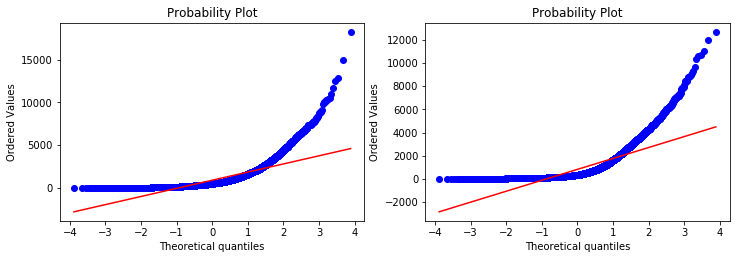

In [24]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(mod_err_LR, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(mod_err_RFR, dist="norm", plot=pylab)
pylab.show()

выборки не особо нормальные, но все равно попробуем

проверяем гипотезу равенства средних против их не равенства.

Используем критерий Стьюдента для связных выборок.

In [25]:
stats.ttest_rel(mod_err_LR, mod_err_RFR)

Ttest_relResult(statistic=12.745056775182134, pvalue=5.428654818173066e-37)

имеем: pv < 0.05  =>  гипотезу равенства отвергаем

In [26]:
from statsmodels.stats.weightstats import *

для расчета доверительного интервала используем следующий алгоритм, поскольку выборки ЗАВИСИМЫЕ (т.к. на одних данных)

In [27]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(mod_err_LR - mod_err_RFR).tconfint_mean())

95% confidence interval: [72.497266, 98.849770]


ПРИМЕЧАНИЕ: имхо, если бы были не зависимыми, мы использовали бы это:

In [28]:
cm = CompareMeans(DescrStatsW(mod_err_LR), DescrStatsW(mod_err_RFR))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [58.019470, 113.327566]
